<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.558949,92.557833,37.960705,-2.790603,227.286884,230.384337,-3.097453
1,0.0,1.0,43.951752,60.195321,45.802838,-18.640092,141.309820,157.690516,-16.380697
2,0.0,2.0,84.456462,95.499786,63.258630,-0.814554,252.400324,253.727213,-1.326889
3,0.0,3.0,61.827094,55.458524,59.106220,-9.338640,177.053198,184.990743,-7.937545
4,0.0,4.0,69.978492,86.208501,41.040084,6.761309,213.988387,206.593276,7.395111
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.130095,41.989027,36.084447,1.517455,143.721024,143.338335,0.382689
59996,999.0,56.0,31.572026,83.337015,33.097776,-1.399152,156.607665,160.452736,-3.845071
59997,999.0,57.0,85.197533,22.092798,42.887027,1.860430,162.037789,160.682451,1.355337
59998,999.0,58.0,65.700415,36.097305,67.155638,1.071816,180.025175,178.444278,1.580896


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.558949  92.557833  37.960705  -2.790603  227.286884   
      1.0    43.951752  60.195321  45.802838 -18.640092  141.309820   
      2.0    84.456462  95.499786  63.258630  -0.814554  252.400324   
      3.0    61.827094  55.458524  59.106220  -9.338640  177.053198   
      4.0    69.978492  86.208501  41.040084   6.761309  213.988387   
...                ...        ...        ...        ...         ...   
999.0 55.0   54.130095  41.989027  36.084447   1.517455  143.721024   
      56.0   31.572026  83.337015  33.097776  -1.399152  156.607665   
      57.0   85.197533  22.092798  42.887027   1.860430  162.037789   
      58.0   65.700415  36.097305  67.155638   1.071816  180.025175   
      59.0   33.210723  88.483361  92.819849   0.771750  225.285683   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    230.384337  -3.097453  
      1.0    157.690516 -16.380697  
      2.0    253.727213  -1.326889  
      3.0    184.990743  -7.937545  
      4.0    206.593276   7.395111  
...                 ...        ...  
999.0 55.0   143.338335   0.382689  
      56.0   160.452736  -3.845071  
      57.0   160.682451   1.355337  
      58.0   178.444278   1.580896  
      59.0   224.102714   1.182969  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.558949  92.557833  37.960705  -2.790603  227.286884   
      1.0    43.951752  60.195321  45.802838 -18.640092  141.309820   
      2.0    84.456462  95.499786  63.258630  -0.814554  252.400324   
      3.0    61.827094  55.458524  59.106220  -9.338640  177.053198   
      4.0    69.978492  86.208501  41.040084   6.761309  213.988387   
...                ...        ...        ...        ...         ...   
999.0 55.0   54.130095  41.989027  36.084447   1.517455  143.721024   
      56.0   31.572026  83.337015  33.097776  -1.399152  156.607665   
      57.0   85.197533  22.092798  42.887027   1.860430  162.037789   
      58.0   65.700415  36.097305  67.155638   1.071816  180.025175   
      59.0   33.210723  88.483361  92.819849   0.771750  225.285683   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    230.384337  -3.097453  
      1.0    157.690516 -16.380697  
      2.0    253.727213  -1.326889  
      3.0    184.990743  -7.937545  
      4.0    206.593276   7.395111  
...                 ...        ...  
999.0 55.0   143.338335   0.382689  
      56.0   160.452736  -3.845071  
      57.0   160.682451   1.355337  
      58.0   178.444278   1.580896  
      59.0   224.102714   1.182969  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.558949,92.557833,37.960705,-2.790603,227.286884,230.384337,-3.097453
1,0.0,1.0,43.951752,60.195321,45.802838,-18.640092,141.309820,157.690516,-16.380697
2,0.0,2.0,84.456462,95.499786,63.258630,-0.814554,252.400324,253.727213,-1.326889
3,0.0,3.0,61.827094,55.458524,59.106220,-9.338640,177.053198,184.990743,-7.937545
4,0.0,4.0,69.978492,86.208501,41.040084,6.761309,213.988387,206.593276,7.395111
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.130095,41.989027,36.084447,1.517455,143.721024,143.338335,0.382689
59996,999.0,56.0,31.572026,83.337015,33.097776,-1.399152,156.607665,160.452736,-3.845071
59997,999.0,57.0,85.197533,22.092798,42.887027,1.860430,162.037789,160.682451,1.355337
59998,999.0,58.0,65.700415,36.097305,67.155638,1.071816,180.025175,178.444278,1.580896


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.558949  92.557833  37.960705  -2.790603  227.286884   
      1.0    43.951752  60.195321  45.802838 -18.640092  141.309820   
      2.0    84.456462  95.499786  63.258630  -0.814554  252.400324   
      3.0    61.827094  55.458524  59.106220  -9.338640  177.053198   
      4.0    69.978492  86.208501  41.040084   6.761309  213.988387   
...                ...        ...        ...        ...         ...   
999.0 55.0   54.130095  41.989027  36.084447   1.517455  143.721024   
      56.0   31.572026  83.337015  33.097776  -1.399152  156.607665   
      57.0   85.197533  22.092798  42.887027   1.860430  162.037789   
      58.0   65.700415  36.097305  67.155638   1.071816  180.025175   
      59.0   33.210723  88.483361  92.819849   0.771750  225.285683   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    230.384337  -3.097453  
      1.0    157.690516 -16.380697  
      2.0    253.727213  -1.326889  
      3.0    184.990743  -7.937545  
      4.0    206.593276   7.395111  
...                 ...        ...  
999.0 55.0   143.338335   0.382689  
      56.0   160.452736  -3.845071  
      57.0   160.682451   1.355337  
      58.0   178.444278   1.580896  
      59.0   224.102714   1.182969  

[60000 rows x 7 columns]

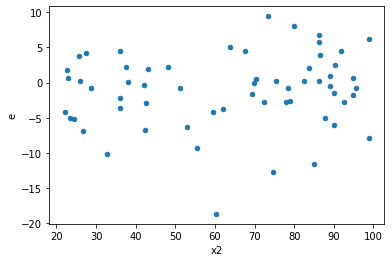

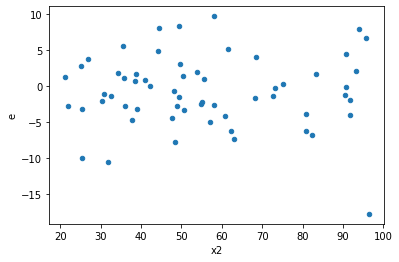

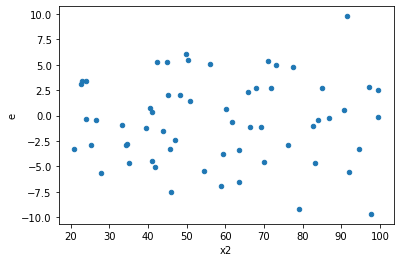

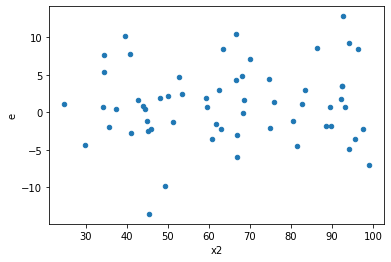

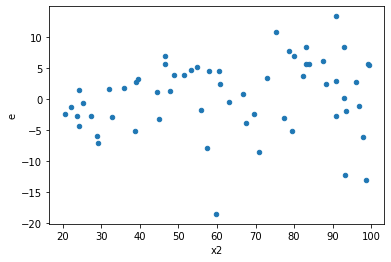

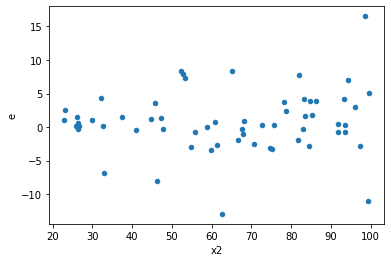

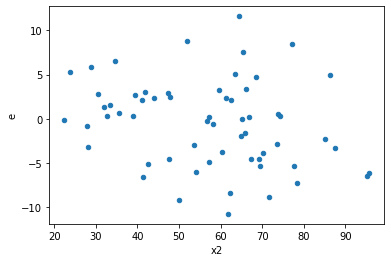

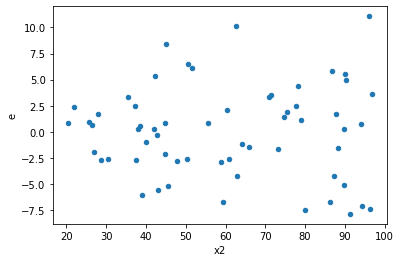

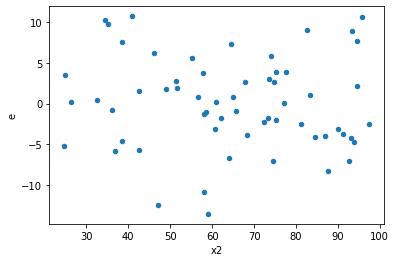

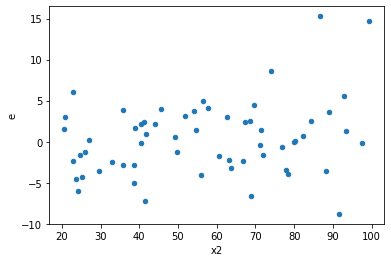

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,27.0,27.0,564.6739461010953,841.5134176993859,20.913849855596123,31.167163618495774,1.4902642905871333,0.30601606726365493,0.8469919663681725,0.15300803363182747,Reject001=1 : Homoscedasticity
1.0,22.0,32.0,407.7651657211489,895.8972275522397,18.534780260052223,27.99678836100749,1.5105001498911004,0.2813932749191892,0.8593033625404054,0.1406966374595946,Reject001=1 : Homoscedasticity
2.0,25.0,29.0,362.02304092096756,499.2247800176391,14.480921636838703,17.21464758681514,1.1887812128629978,0.6497127094739517,0.6751436452630242,0.3248563547369758,Reject001=1 : Homoscedasticity
3.0,33.0,21.0,764.7947125980011,589.3882508046491,23.175597351454577,28.06610718117377,1.211019796191456,0.654642912728197,0.6726785436359015,0.3273214563640985,Reject001=1 : Homoscedasticity
7.0,27.0,27.0,351.67390743266077,433.8549427834148,13.024959534542992,16.068701584570917,1.2336853363694325,0.5891328711974284,0.7054335644012858,0.2945664355987142,Reject001=1 : Homoscedasticity
8.0,29.0,25.0,887.874714553505,951.4313749472609,30.61636946736224,38.05725499789044,1.2430361816237014,0.5844720372242063,0.7077639813878969,0.29223601861210313,Reject001=1 : Homoscedasticity
9.0,25.0,29.0,326.6955056596687,567.4547912990647,13.067820226386749,19.567406596519472,1.4973734148108846,0.2948305969075118,0.8525847015462441,0.1474152984537559,Reject001=1 : Homoscedasticity
10.0,24.0,30.0,407.38478443966517,1014.9798664364107,16.974366018319383,33.83266221454702,1.993162052593512,0.07441955744372408,0.962790221278138,0.03720977872186204,Reject001=1 : Homoscedasticity
11.0,24.0,30.0,244.1062219995053,1082.964925314121,10.17109258331272,36.09883084380404,3.5491595959936353,0.0012547234743043312,0.9993726382628478,0.0006273617371521656,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,27.0,564.6739461010953,841.5134176993859,20.913849855596123,31.167163618495774,1.4902642905871333,0.30601606726365493,Reject001=1 : Homoscedasticity
1.0,22.0,32.0,407.7651657211489,895.8972275522397,18.534780260052223,27.99678836100749,1.5105001498911004,0.2813932749191892,Reject001=1 : Homoscedasticity
2.0,25.0,29.0,362.02304092096756,499.2247800176391,14.480921636838703,17.21464758681514,1.1887812128629978,0.6497127094739517,Reject001=1 : Homoscedasticity
3.0,33.0,21.0,764.7947125980011,589.3882508046491,23.175597351454577,28.06610718117377,1.211019796191456,0.654642912728197,Reject001=1 : Homoscedasticity
4.0,27.0,27.0,1258.251947141383,711.9567545268353,46.60192396819937,26.368768686179084,0.5658300439306505,0.14532726861340928,Reject001=1 : Homoscedasticity
5.0,26.0,28.0,730.7066401567149,334.38321773542543,28.104101544489033,11.942257776265194,0.4249293562137362,0.031248703952141712,Reject001=1 : Homoscedasticity
6.0,28.0,26.0,628.7446913314568,550.2965507055176,22.45516754755203,21.165251950212216,0.9425559575715374,0.8752406929792556,Reject001=1 : Homoscedasticity
7.0,27.0,27.0,351.67390743266077,433.8549427834148,13.024959534542992,16.068701584570917,1.2336853363694325,0.5891328711974284,Reject001=1 : Homoscedasticity
8.0,29.0,25.0,887.874714553505,951.4313749472609,30.61636946736224,38.05725499789044,1.2430361816237014,0.5844720372242063,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      958
Reject001=0 : Heteroscedasticity     42
Name: Result_test, dtype: int64